In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pylab as plt

import sys
sys.path.append('/home/scratch/psalas/LASSI/lassi-analysis_v2')

from plotting import barChartPlot, surfacePlot
from lassiAnalysis import extractZernikesLeicaScanPair

In [3]:
def extractZernikesLeicaScanPairSummary(refScanFile, sigScanFile, n=512,
                                        pFitGuess=[60., 0., 0., -50., 0., 0.], rMaskRadius=49.,
                                        nZern=36, expected=[], **kwargs):
    
    x,y,dz0,fl = extractZernikesLeicaScanPair(refScanFile, sigScanFile, n=n, nZern=nZern, 
                                         pFitGuess=pFitGuess, rMaskRadius=rMaskRadius,
                                         **kwargs)
    
    # Plot a bar chart with the recovered and expected values.
    barChartPlot(np.arange(1,36), np.asarray(fl[1:36])*1e6, expected=expected[1:36])
    # Show surface deformation map.
    surfacePlot(x, y, dz0, vMin=-5e-4, vMax=5e-4)
    
    return fl

In [4]:
path = "/home/scratch/psalas/LASSI/gpus/output/March2020"
path = "/home/scratch/psalas/LASSI/gpus/output"

In [24]:
from zernikies import getZernikeCoeffs

<IPython.core.display.Javascript object>


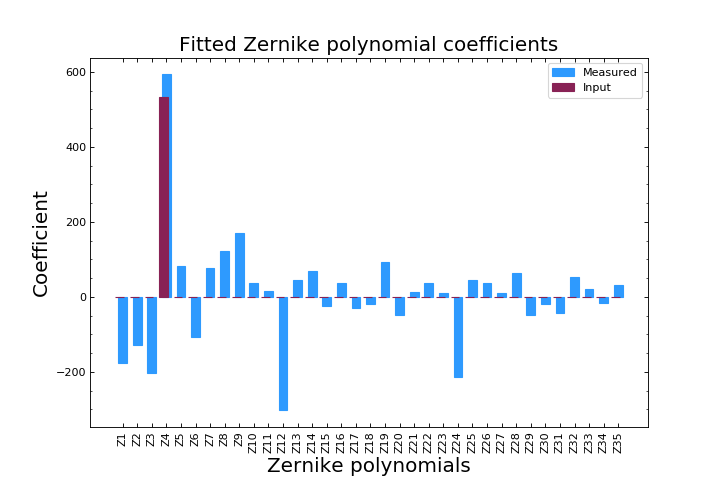

<IPython.core.display.Javascript object>


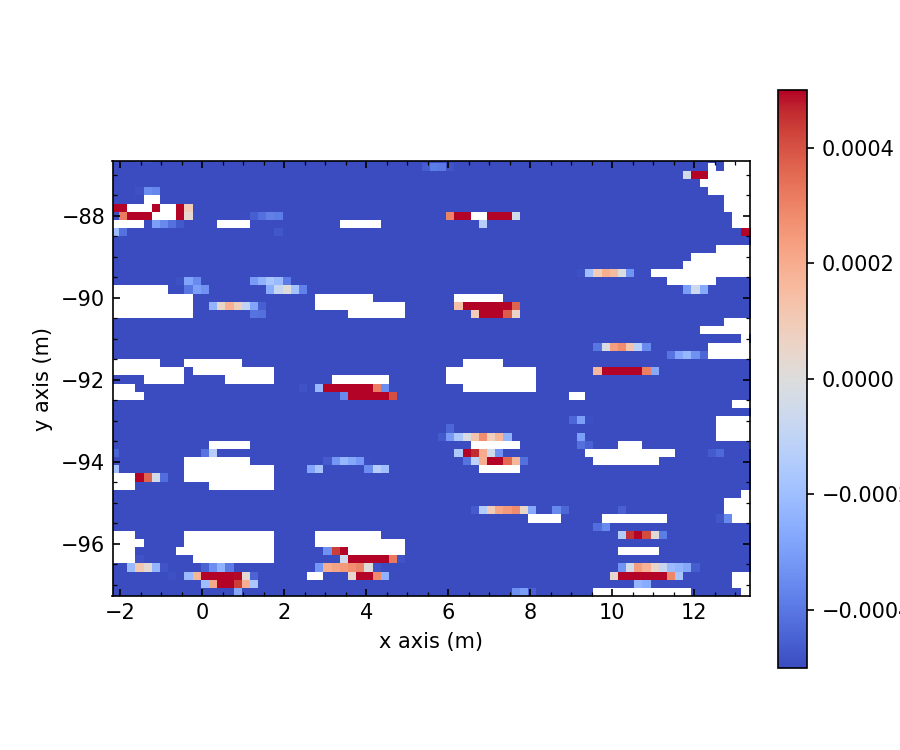

In [28]:
dz0_ = np.ma.masked_outside(dz0, -3e-3, 3e-3)
fl_ = getZernikeCoeffs((dz0_).filled(0), 36, norm='active-surface')
barChartPlot(np.arange(1,36), np.asarray(fl_[1:36])*1e6, expected=expected[1:36])
surfacePlot(x, y, dz0_, vMin=-5e-4, vMax=5e-4)

<IPython.core.display.Javascript object>


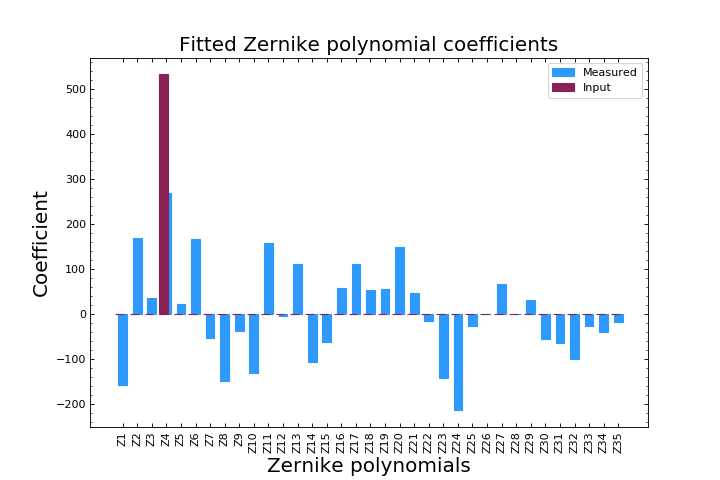

<IPython.core.display.Javascript object>


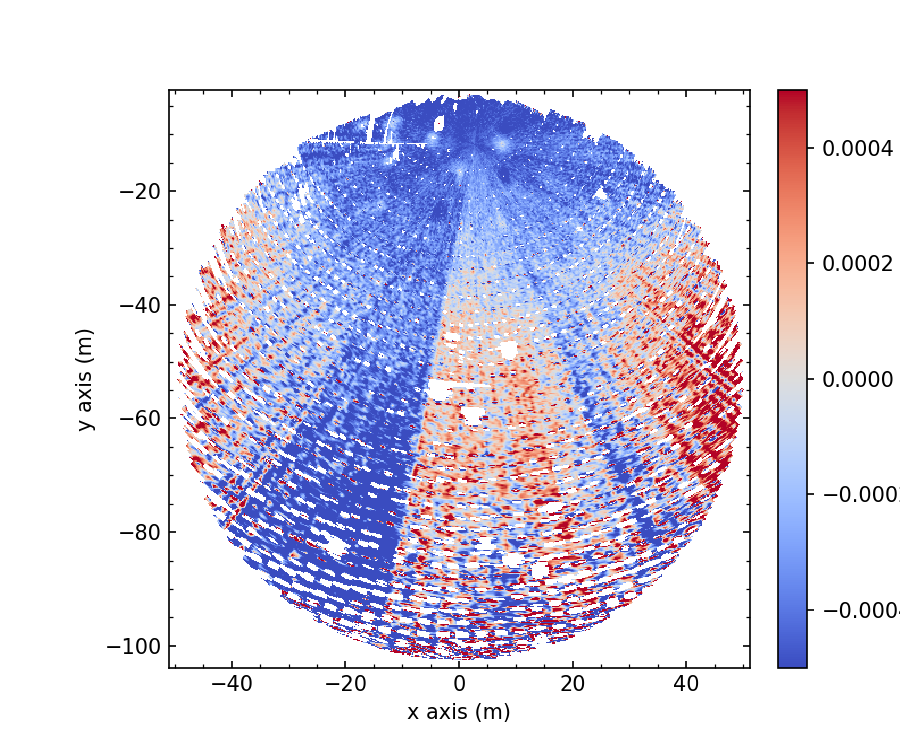

0.00026877922900727324 -49.47758853246744


In [29]:
refScanFile = "{0}/2020_03_16_02:21:06.ptx.csv".format(path)
sigScanFile = "{0}/2020_03_16_02:28:31.ptx.csv".format(path)
x,y,dz0,fl = extractZernikesLeicaScanPair(refScanFile, sigScanFile, n=512, nZern=36, 
                                         pFitGuess=[60., 0., 0., -50., 0., 0.], rMaskRadius=50.,
                                         **{'sigma':3})
# What are we expecting?
# Based on the active surface fits file.
iz = 4
expected = np.zeros(37)
expected[4] = 532.
# Plot a bar chart with the recovered and expected values.
barChartPlot(np.arange(1,36), np.asarray(fl[1:36])*1e6, expected=expected[1:36])
# Show surface deformation map.
surfacePlot(x, y, dz0, vMin=-5e-4, vMax=5e-4)
print(fl[iz], (fl[iz]*1e6-expected[iz])/expected[iz]*100.)